<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-code" data-toc-modified-id="Import-code-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import code</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examples</a></span><ul class="toc-item"><li><span><a href="#Data-query" data-toc-modified-id="Data-query-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data query</a></span></li><li><span><a href="#Computing-extinctions" data-toc-modified-id="Computing-extinctions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Computing extinctions</a></span></li><li><span><a href="#Extinction-towards-Upper-Scorpius" data-toc-modified-id="Extinction-towards-Upper-Scorpius-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Extinction towards Upper Scorpius</a></span></li><li><span><a href="#Age-estimate-for-a-list-of-stars" data-toc-modified-id="Age-estimate-for-a-list-of-stars-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Age estimate for a list of stars</a></span></li><li><span><a href="#Mass-estimate-for-$\beta$-Pictoris-b" data-toc-modified-id="Mass-estimate-for-$\beta$-Pictoris-b-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Mass estimate for $\beta$ Pictoris b</a></span></li></ul></li><li><span><a href="#Utils" data-toc-modified-id="Utils-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Utils</a></span><ul class="toc-item"><li><span><a href="#Printing-information-about-a-model" data-toc-modified-id="Printing-information-about-a-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Printing information about a model</a></span></li><li><span><a href="#Visualizing-the-variation-of-a-quantity-across-the-isochrone-grid" data-toc-modified-id="Visualizing-the-variation-of-a-quantity-across-the-isochrone-grid-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualizing the variation of a quantity across the isochrone grid</a></span></li></ul></li><li><span><a href="#Comparison-with-external-catalogs" data-toc-modified-id="Comparison-with-external-catalogs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison with external catalogs</a></span></li></ul></div>

## Import code

In [2]:
import sys
sys.path.append(r'C:\Users\Vito\Desktop\PhD\Progetti\MADYS')
from madys import *

## Examples

### Data query

In [5]:
def show(s,**kwargs):
    if s=='dam_5stars':
        dam_file3=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\damiani_bf_stars2.txt'
        p1=SampleObject(dam_file3,id_type='DR2',**kwargs) #searchs for all data
    elif s=='proxima':
        prox_file=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\proxima.txt'
        p1=SampleObject(prox_file,id_type='EDR3',**kwargs)
    elif s=='dam_full':
        dam_file2=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\damiani_bf_stars.txt'
        p1=SampleObject(dam_file2,id_type='DR2',**kwargs) #searchs for all data  
    elif s=='100000stars':        
        s100000=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\100000_stars.csv' #(ra, dec) of bona-fide sources
        p1=SampleObject(s100000,id_type='EDR3',**kwargs) #searchs for all data 
    elif s=='no_dr2':        
        f_nodr2=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\no_dr2.csv' #(ra, dec) of bona-fide sources
        p1=SampleObject(f_nodr2,id_type='EDR3',**kwargs) #searchs for all data 
    elif s=='els_field':        
        f_els=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\els_field.csv' #ELS + background
        p1=SampleObject(f_els,id_type='EDR3',**kwargs) #searchs for all data 
    elif s=='1000stars':        
        f=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\1000stars.csv' #1000 random stars
        p1=SampleObject(f,id_type='EDR3',**kwargs) #searchs for all data 
    return p1.phot_table

show('dam_5stars',surveys=['gaia','2mass','wise'])

Total time needed to retrieve photometry for 5 targets: - 00:00:03.61
Time for the computation of extinctions: 1.54 s


ID,edr3_id,dr2_id,tmass_id,allwise_id,ra,dec,edr3_epoch,edr3_parallax,edr3_parallax_error,edr3_parallax_over_error,edr3_pmra,edr3_pmra_error,edr3_pmdec,edr3_pmdec_error,edr3_ra_dec_corr,edr3_ra_parallax_corr,edr3_ra_pmra_corr,edr3_ra_pmdec_corr,edr3_dec_parallax_corr,edr3_dec_pmra_corr,edr3_dec_pmdec_corr,edr3_parallax_pmra_corr,edr3_parallax_pmdec_corr,edr3_pmra_pmdec_corr,edr3_phot_g_mean_mag,edr3_phot_g_mean_flux,edr3_phot_g_mean_flux_error,edr3_phot_bp_mean_flux,edr3_phot_bp_mean_flux_error,edr3_phot_bp_mean_mag,edr3_phot_rp_mean_flux,edr3_phot_rp_mean_flux_error,edr3_phot_rp_mean_mag,edr3_bp_rp,edr3_phot_bp_rp_excess_factor,edr3_ruwe,edr3_astrometric_params_solved,dr2_epoch,dr2_ra,dr2_dec,dr2_parallax,dr2_parallax_error,dr2_parallax_over_error,dr2_pmra,dr2_pmra_error,dr2_pmdec,dr2_pmdec_error,dr2_ra_dec_corr,dr2_ra_parallax_corr,dr2_ra_pmra_corr,dr2_ra_pmdec_corr,dr2_dec_parallax_corr,dr2_dec_pmra_corr,dr2_dec_pmdec_corr,dr2_parallax_pmra_corr,dr2_parallax_pmdec_corr,dr2_pmra_pmdec_corr,dr2_phot_g_mean_mag,dr2_phot_g_mean_flux,dr2_phot_g_mean_flux_error,dr2_phot_bp_mean_flux,dr2_phot_bp_mean_flux_error,dr2_phot_bp_mean_mag,dr2_phot_rp_mean_flux,dr2_phot_rp_mean_flux_error,dr2_phot_rp_mean_mag,dr2_bp_rp,dr2_phot_bp_rp_excess_factor,dr2_ruwe,dr2_astrometric_params_solved,radial_velocity,radial_velocity_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ph_qual,tmass_ra,tmass_dec,w1mpro,w1mpro_error,w2mpro,w2mpro_error,w3mpro,w3mpro_error,w4mpro,w4mpro_error,cc_flags,ext_flag,var_flag,ph_qual_2,tmass_key,wise_ra,wise_dec,edr3_gmag_corr,edr3_gflux_corr,edr3_phot_bp_rp_excess_factor_corr,edr3_phot_g_mean_mag_error,edr3_phot_bp_mean_mag_error,edr3_phot_rp_mean_mag_error,dr2_phot_bp_rp_excess_factor_corr,dr2_g_mag_error,dr2_bp_mag_error,dr2_rp_mag_error,ebv
,,,,,deg,deg,yr,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,yr,deg,deg,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,km / s,km / s,mag,mag,mag,mag,mag,mag,,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,deg,deg,mag,'electron'.s**-1,,mag,mag,mag,,mag,mag,mag,
str28,object,object,object,object,float64,float64,float64,float64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float64,float32,float32,float32,float32,float32,int16,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,int16,float64,float64,float32,float32,float32,float32,float32,float32,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int16,object,object,int64,float64,float64,float32,float64,float32,float64,float64,float64,float32,float64,float64,float64,float64
Gaia DR2 5364724700323400704,Gaia EDR3 5364724700323400704,Gaia DR2 5364724700323400704,10304069-4809006,,157.6693908070584,-48.150173490469,2016.0,7.694504002675636,0.016904518,455.1744,-26.042062183136295,0.017626585,2.122200465393095,0.019002562,0.22326018,-0.066583514,-0.28965095,-0.07291952,0.122062795,-0.05801573,-0.30729574,0.12988837,-0.015411283,0.24223883,14.463826,30861.452307826446,32.119118,6550.590392901756,32.525906,15.797841,37252.78509421986,103.45623,13.319999,2.4778423,1.4193556,1.0622715,31,2015.5,157.66939622518927,-48.150173775678454,7.626506124956317,0.03508174106484546,217.39247,-26.030115179360216,0.06472771010728053,2.033002183381313,0.0684717354809097,0.13726173,-0.12120201,-0.44884798,-0.053068135,0.20600867,-0.072801255,-0.44958127,-0.0708433,-0.16357431,0.3807051,14.476107,30542.420039259527,39.14865165741708,6599.7961954163275,40.610601097643716,15.802562

Results:

- dam_full (10394 stars): the query took 4.5 minutes (21/04/2022) in one occasion, 3.4 minutes in another (22/04/2022);
- 100000stars (100000 stars): the query took 18:22 minutes on 22/04/2022 (11:47 for the first query, 3:35 for the 2MASS query of missing objects, 3:00 for the SIMBAD query of individual 2MASS objects). The computation of extinctions took 40 s;
- els_field (6343 stars): the query took on 22/04/2022 (00:56 for the first query, 46 s for the 2MASS query of missing objects, 180 s for the SIMBAD query of individual 2MASS objects);
- 1000stars (1000 stars): 8 s for the first query, 0.9 s for 2MASS, 58 s for the SIMBAD query.

### Computing extinctions

In [6]:
if 'p1' not in locals():
    f=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\1000stars.csv' #1000 random stars
    p1=SampleObject(f,id_type='EDR3') #searchs for all data 

t0=time.perf_counter()
ra=np.array(p1.good_phot['ra'].filled(np.nan))
dec=np.array(p1.good_phot['dec'].filled(np.nan))
par=np.array(p1.good_phot['edr3_parallax'].filled(np.nan))
par_err=np.array(p1.good_phot['edr3_parallax_error'].filled(np.nan))

tt0=time.perf_counter()
SampleObject.interstellar_ext(ra=ra,dec=dec,par=par)
tt1=time.perf_counter()
SampleObject.interstellar_ext(ra=ra,dec=dec,par=par,ext_map='stilism')
tt2=time.perf_counter()
#MADYS.interstellar_ext(ra=ra,dec=dec,par=par,error=True)
#tt2=time.perf_counter()
print("Total time needed to compute extinction for "+ str(len(ra))+ " targets (Leike's map): - {:.2f}".format(tt1-tt0)+' s')
print("Total time needed to compute extinction for "+ str(len(ra))+ " targets (STILISM map): - {:.2f}".format(tt2-tt1)+' s')

Total time needed to retrieve photometry for 1000 targets: - 00:00:23.62
Time for the computation of extinctions: 2.61 s
Total time needed to compute extinction for 1000 targets (Leike's map): - 2.21 s
Total time needed to compute extinction for 1000 targets (STILISM map): - 15.28 s


### Extinction towards Upper Scorpius

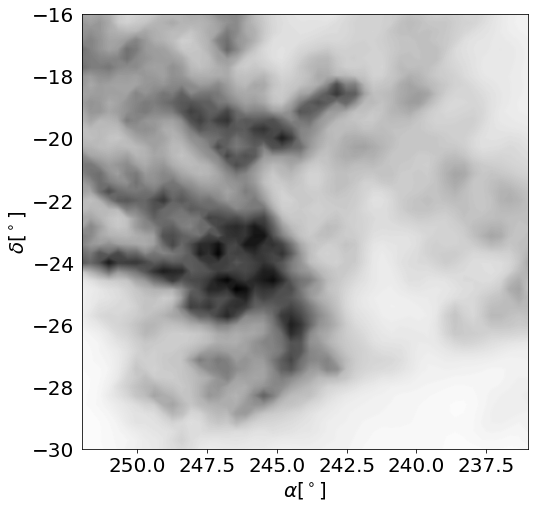

In [15]:
grid_x=np.linspace(236,252,1000)
grid_y=np.linspace(-30,-16,1000)
XX, YY = np.meshgrid(grid_x,grid_y)

fontsize=20

fig, ax = plt.subplots(figsize=(8,8))
SampleObject.plot_2D_ext(ra=[236,252],dec=[-30,-16],d=160,color='G',reverse_xaxis=True,cmap='gray_r',fontsize=fontsize,colorbar=False,ax=ax)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(which='minor', bottom=False)
ax.yaxis.set_tick_params(which='major', bottom=False)
ax.set_xlabel(r'$\alpha [^\circ]$',fontsize=fontsize)
plt.show()

### Age estimate for a list of stars

In [3]:
from astropy.coordinates import Distance
import pickle

def load_ELS(refresh=False):
    path=r'C:\Users\Vito\Desktop\PhD\My papers\mu2 Sco'
    els_file=r'C:\Users\Vito\Desktop\PhD\My papers\mu2 Sco\ELS.csv'
    els0 = pd.read_csv(els_file,sep=',')

    ra_e, dec_e, par_e, par_err_e = els0['ra'].to_numpy(), els0['dec'].to_numpy(), els0['parallax'].to_numpy(), els0['parallax_error'].to_numpy()
    pmra_e, pmra_err_e, pmdec_e, pmdec_err_e = els0['pmra'].to_numpy(), els0['pmra_error'].to_numpy(), els0['pmdec'].to_numpy(), els0['pmdec_error'].to_numpy()
    v_ra_e, v_dec_e = 4.74*pmra_e/par_e, 4.74*pmdec_e/par_e
    coo_e = SkyCoord(ra=ra_e*u.deg,dec=dec_e*u.deg,distance=Distance(parallax=par_e*u.mas))
    gc0_e = coo_e.transform_to(Galactic)
    gl_e, gb_e = gc0_e.l.deg, gc0_e.b.deg
    rv_e, rv_err_e = els0['dr2_radial_velocity'].to_numpy(), els0['dr2_radial_velocity_error'].to_numpy()
    els,=np.where((np.abs(pmra_e+11.7)<7) & (np.abs(pmdec_e+23.1)<7) & (pmdec_e>-25) & (pmra_e<-10.2) & (v_dec_e<-16) & (v_dec_e>-21) & (par_e<6.5) & (par_e>5.3) & (v_ra_e<-7) & (v_ra_e>-10) & (gl_e>345) & (gl_e<347.5) & (gb_e>3.3) & (gb_e<5))
    
    PIK=r'C:\Users\Vito\Desktop\PhD\My papers\mu2 Sco\all_data_ELS.pkl'
    if SampleObject._file_search(PIK)==False: refresh=True
    
    if refresh==False:
        with open(PIK,'rb') as f:
            els_obj=pickle.load(f)
    else:
        els_ids=els0['source_id'].to_numpy()[els]
        els_ids_list = ['Gaia EDR3 '+str(i) for i in els_ids]
        els_obj=SampleObject(els_ids_list,id_type='EDR3',mock_file=path+'damiani_sample_data.txt')
        with open(PIK,'wb') as f:
            pickle.dump(els_obj,f)
    
    return ra_e[els],dec_e[els],par_e[els],par_err_e[els],pmra_e[els],pmra_err_e[els],pmdec_e[els],pmdec_err_e[els],rv_e[els],rv_err_e[els],gl_e[els],gb_e[els],v_ra_e[els],v_dec_e[els],els_obj

ra_e,dec_e,par_e,par_err_e,pmra_e,pmra_err_e,pmdec_e,pmdec_err_e,rv_e,rv_err_e,gl_e,gb_e,v_ra_e,v_dec_e,els_obj=load_ELS(refresh=True)

#res1=els_obj.get_agemass('bhac15',age_range=[1,300],n_try=200)
res1=els_obj.get_params('bhac15',age_range=[1,300],n_try=200,save_maps=True,verbose=0)

Total time needed to retrieve photometry for 73 targets: - 00:00:06.91
Time for the computation of extinctions: 1.53 s
Program running. Done: 11/73 (15.1%). Estimated time left: 392 s.
Program running. Done: 29/73 (39.7%). Estimated time left: 197 s.
Program running. Done: 49/73 (67.1%). Estimated time left: 96 s.
Program running. Done: 72/73 (98.6%). Estimated time left: 4 s.
Execution ended. Elapsed time: 261 s.


Star 5


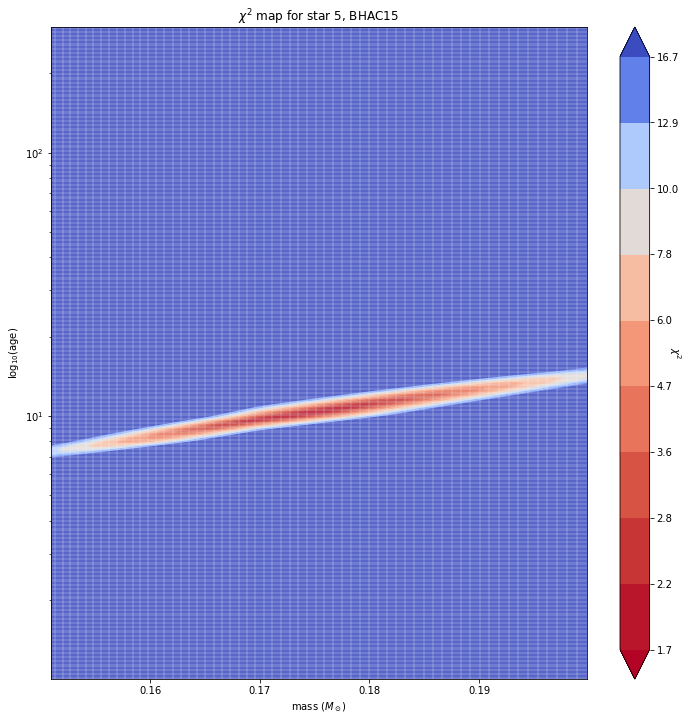

In [4]:
res1.plot_maps(5)

### Mass estimate for $\beta$ Pictoris b

In [6]:
file_b=Table([['beta Pic b'],[9+3.526],[np.sqrt(0.222**2+0.2**2)],[50.930690628822894],[0.14821085]],names=('object_name','SPH_K1','SPH_K1_err','parallax','parallax_err'))
if 'res_b' not in locals():
    obj_b=SampleObject(file_b,verbose=0)
    res_b=obj_b.get_params('ames_dusty',mass_range=[0.005,0.1],age_range=np.array([[15,12,21]]),m_unit='m_jup',ph_cut=0.8,n_try=10000)

res_b['masses'],res_b['masses_min'],res_b['masses_max']

Execution ended. Elapsed time: 22 s.


(array([10.78420951]), array([9.56445537]), array([11.94255299]))

## Utils

### Printing information about a model

In [4]:
IsochroneGrid.info_models('atmo2020')

Model name: ATMO 2020
Reference: Phillips et al., A&A 637, A38 (2020)
Solar metallicity: Z=0.0169
Helium abundance: Y=0.275
Mass range: [0.001,0.075] M_sun
Age range: [1 Myr, 10 Gyr]
Filters: MKO-NIR (MKO_Y, MKO_J, MKO_H, MKO_K, MKO_Lp, MKO_Mp), WISE (W1, W2, W3, W4), Spitzer-IRAC (IRAC1, IRAC2), JWST (MIRI: MIRI_c_F1065C, MIRI_c_F1140C, MIRI_c_F1550C, MIRI_c_F2300C; MIRI_p_F560W, MIRI_p_F770W, MIRI_p_F1000W, MIRI_p_F1130W, MIRI_p_F1280W, MIRI_p_F1500W, MIRI_p_F1800W, MIRI_p_F2100W, MIRI_p_F2550W; NIRCAM: NIRCAM_c210_F182M, NIRCAM_c210_F187N, NIRCAM_c210_F200W, NIRCAM_c210_F210M, NIRCAM_c210_F212N; NIRCAM_c335_F250M, NIRCAM_c335_F300M, NIRCAM_c335_F322W2, NIRCAM_c335_F335M, NIRCAM_c335_F356W, NIRCAM_c335_F360M, NIRCAM_c335_F410M, NIRCAM_c335_F430M, NIRCAM_c335_F444W, NIRCAM_c335_F460M, NIRCAM_c335_F480M; NIRCAM_c430_F250M, NIRCAM_c430_F300M, NIRCAM_c430_F322W2, NIRCAM_c430_F335M, NIRCAM_c430_F356W, NIRCAM_c430_F360M, NIRCAM_c430_F410M, NIRCAM_c430_F430M, NIRCAM_c430_F444W, NIRCAM_c430_

### Visualizing the variation of a quantity across the isochrone grid

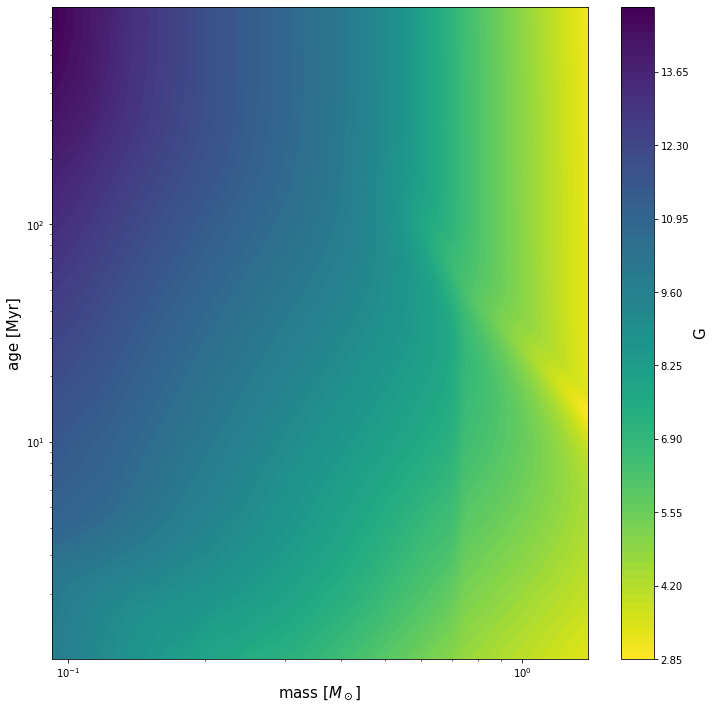

In [3]:
IsochroneGrid.plot_iso_grid('G','parsec',x_log=True,y_log=True)

## Comparison with external catalogs

We assess the accuracy of best-fit radii by taking a sample of stars with interferometric radius measurements. The sample is done by assembling:

- Huber et al. (2012);
- Boyajian et al. (2012a);
- Boyajian et al. (2012b);

Angular diameters are turned into radii by means of Gaia EDR3 parallaxes.

In [7]:
from uncertainties import ufloat, unumpy
from uncertainties.umath import *  # sin(), etc.

l_hub=['HD 173701','HD 175726','HD 177153','HD 181420','HD182736','HD187637'] #Huber et al., ApJ 760, 32 (2012)
l_boy1=['GJ 15A','GJ 33','GJ 105','GJ 166A','GJ 205','GJ 338A','GJ 338B','GJ 380','GJ 411','GJ 412A',
        'GJ 526','GJ 631','GJ 687','GJ 699','GJ 702A','GJ 702B','GJ 725A','GJ 725B','GJ 809','GJ 880','GJ 892']
l_boy2=['HD 4614','HD 5015','HD 6582','HD 10780','HD 16895','HD 19373','HD 20630','HD 22484','HD 30652',
        'HD 34411','HD 39587','HD 48737','HD 56537','HD 58946','HD 81937','HD 82328','HD 82885','HD 86728',
        'HD 90839','HD 95418','HD 97603','HD 101501','HD 102870','HD 103095','HD 109358','HD 114710',
        'HD 118098','HD 126660','HD 128167','HD 131156','HD 141795','HD 142860','HD 146233','HD 162003',
        'HD 164259','HD 173667','HD 177724','HD 182572','HD 185144','HD 185395','HD 210418','HD 213558',
        'HD 215648','HD 222368']

hub_radii=np.array([0.332,0.346,0.289,0.34,0.436,0.231])
hub_radii_err=np.array([0.006,0.007,0.006,0.01,0.005,0.006])
boy1_radii=np.array([1.005,0.868,1.030,1.504,0.943,0.871,0.856,1.225,1.432,0.764,0.835,0.724,0.859,0.952,1.515,1.221,0.937,0.851,0.722,0.744,1.106])
boy1_radii_err=np.array([0.005,0.004,0.007,0.006,0.004,0.015,0.016,0.009,0.013,0.017,0.014,0.011,0.014,0.005,0.005,0.015,0.008,0.015,0.008,0.004,0.007])
boy2_radii=np.array([1.623,0.846,0.947,0.744,1.078,1.217,0.914,1.056,1.488,0.958,1.027,1.369,0.824,0.837,1.113,1.591,0.8,0.753,0.778,
                     1.133,1.304,0.887,1.396,0.679,1.209,1.1,0.84,1.086,0.824,1.163,0.756,1.191,0.763,0.93,0.761,0.979,0.883,0.823,
                     1.219,0.845,0.849,0.625,1.068,1.059])
boy2_radii_err=np.array([0.004,0.01,0.009,0.018,0.008,0.007,0.024,0.014,0.004,0.015,0.009,0.009,0.013,0.013,0.009,0.005,0.012,0.012,0.014,
                         0.014,0.008,0.009,0.006,0.005,0.03,0.011,0.009,0.007,0.013,0.014,0.017,0.005,0.017,0.025,0.027,0.006,0.016,0.025,
                         0.011,0.015,0.017,0.021,0.008,0.009])

int_sample=list(np.hstack((l_hub,l_boy1,l_boy2)))
int_radii=np.hstack((hub_radii,boy1_radii,boy2_radii))
int_radii_err=np.hstack((hub_radii_err,boy1_radii_err,boy2_radii_err))

int_obj=SampleObject(int_sample,verbose=0,id_type='other')
p=np.array([ufloat(int_obj.par[i],int_obj.par_err[i]) for i in range(len(int_obj))])

r_interf, r_interf_err = np.array([i.n for i in int_radii/2/p*u.au.to(R_sun)]), np.array([i.s for i in int_radii/2/p*u.au.to(R_sun)])

hub_feh=np.array([0.34,-0.07,-0.09,0.00,-0.15,-0.17])
boy1_feh=np.array([-0.36,-0.22,-0.08,-0.24,0-35,-0.18,-0.15,-0.16,-0.41,-0.4,-0.3,
                  0.04,-0.09,-0.39,0.03,0.03,-0.49,-0.36,-0.21,0.06,0.07])
boy2_feh=np.array([-0.3,0.0,-0.83,0.05,-0.12,0.09,0.0,-0.09,-0.03,0.05,-0.16,0.01,
                  -0.31,0.06,-0.12,0.06,0.2,-0.16,0.06,0.2,-0.16,0.06,0.0,-0.12,
                  0.11,-1.36,-0.3,-0.06,-0.02,-0.14,-0.36,-0.33,-0.19,-0.02,
                  -0.17,-0.14,-0.15,-0.68,0.33,-0.24,-0.04,-0.38,-0.24,-0.08])
feh=np.hstack((hub_feh,boy1_feh,boy2_feh))

int_res=int_obj.get_params('parsec',age_range=[500,7000],verbose=False,feh=feh)

Program running. Done: 28/71 (39.4%). Estimated time left: 106 s.
Program running. Done: 30/71 (42.3%). Estimated time left: 137 s.
Program running. Done: 32/71 (45.1%). Estimated time left: 150 s.
Program running. Done: 34/71 (47.9%). Estimated time left: 162 s.
Program running. Done: 39/71 (54.9%). Estimated time left: 149 s.
Program running. Done: 65/71 (91.5%). Estimated time left: 20 s.
Program running. Done: 69/71 (97.2%). Estimated time left: 7 s.
Execution ended. Elapsed time: 260 s.


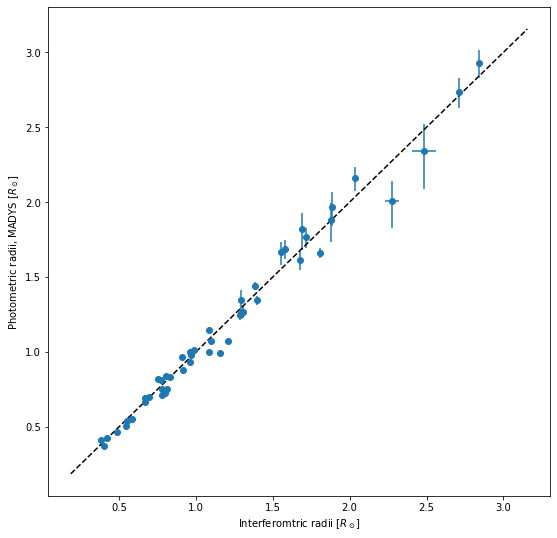

In [9]:
r_min=np.min([np.nanmin(r_interf),np.nanmin(int_res['radii'])])
r_max=np.max([np.nanmax(r_interf),np.nanmax(int_res['radii'])])
plt.figure(figsize=(9,9))
plt.errorbar(r_interf,int_res['radii'],xerr=r_interf_err,yerr=np.vstack((int_res['radii_max']-int_res['radii'],int_res['radii']-int_res['radii_min'])),fmt='o')
plt.plot([r_min,r_max],[r_min,r_max],linestyle='dashed',color='black')
plt.xlabel(r'Interferomtric radii [$R_\odot$]')
plt.ylabel(r'Photometric radii, MADYS [$R_\odot$]')
plt.show()